
<p align="center">Curso:Machine Learning</p>

<p align="center"> Código Curso: 203008067 </p>

<p align="center"> Grupo: 2 </p>

<p align="center"> Fase 2 - Componente práctico - Algoritmos no supervisados</p>

 <p align="center">  Presentado por: Fernando Arturo Varilla Mendoza </p>

<p align="center"> Código: 203008067A_1705 </p>


<p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA - UNAD </p>



# Acción 1: Aplicación K-Means Clustering.

In [9]:
# Cargar la base de datos

import pandas as pd

df=pd.read_csv("Anexo 1 - zomato.csv",engine='python',encoding="latin-1")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [2]:
# Paquetes a utilizar

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# variables a utilizar para implementar el algoritmo

calificacion_promedio = df['Aggregate rating']
votos = df['Votes']

# dataframe con las variables a utilizar
datos = df[['Aggregate rating', 'Votes']].dropna()


#Normalizar los datos para que ambos tengan el mismo peso
scaler = StandardScaler()
datos_normalizados = scaler.fit_transform(datos)

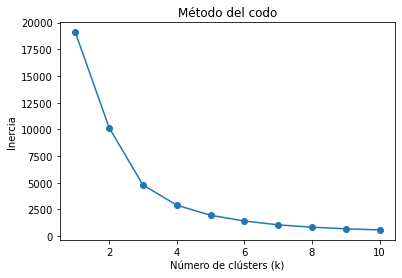

In [3]:
# Utilizaremos el metodo del codo para seleccionar el numero optimo de K
inercia = [KMeans(n_clusters=k, random_state=42).fit(datos_normalizados).inertia_ for k in range(1, 11)]

# Graficar el método del codo
plt.plot(range(1, 11), inercia, marker='o')
plt.title("Método del codo")
plt.xlabel("Número de clústers (k)")
plt.ylabel("Inercia")
plt.show()

# Como se puede observar graficamente luego de k=3 hay un decaimiento brusco por lo que seleccionamos 2 cluster

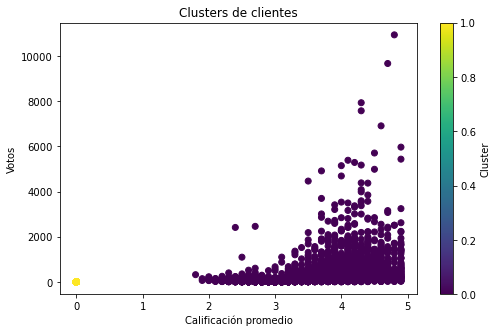

In [4]:
# Aplicacion del algoritmo 

k_optimo = 2

#  Aplicacion k-means con k óptimo
modelo_kmeans_final = KMeans(n_clusters=k_optimo, random_state=42)
clustering = modelo_kmeans_final.fit_predict(datos_normalizados)

# Agregamos los clústers al DataFrame original
datos['Cluster'] = clustering

# Graficar los clústers
plt.figure(figsize=(8, 5))
plt.scatter(datos['Aggregate rating'], datos['Votes'], c=datos['Cluster'], cmap='viridis')
plt.title("Clusters de clientes")
plt.xlabel("Calificación promedio")
plt.ylabel("Votos")
plt.colorbar(label='Cluster')
plt.show()


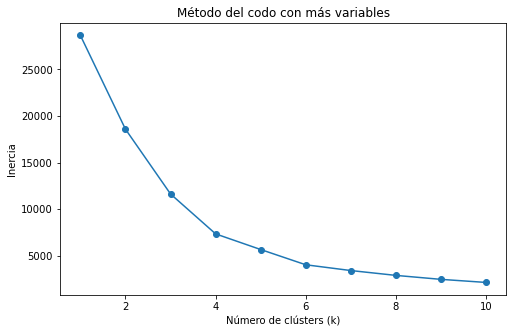

In [5]:
#  Incrementar variables numéricas y repetir
# Agregar más variables, como "Price range"


datos_extra = df[['Aggregate rating', 'Votes', 'Price range']].dropna()
datos_normalizados_extra = scaler.fit_transform(datos_extra)

# Repetir el método del codo para estas variables
inercia_extra = []
rango_k = range(1, 11)

for k in rango_k:
    modelo_kmeans_extra = KMeans(n_clusters=k, random_state=42)
    modelo_kmeans_extra.fit(datos_normalizados_extra)
    inercia_extra.append(modelo_kmeans_extra.inertia_)

# Graficar el nuevo método del codo
plt.figure(figsize=(8, 5))
plt.plot(rango_k, inercia_extra, marker='o')
plt.title("Método del codo con más variables")
plt.xlabel("Número de clústers (k)")
plt.ylabel("Inercia")
plt.show()



In [6]:
# Seleccionar el nuevo k óptimo y aplicar k-means
k_optimo_extra = 1  # Cambiar según el gráfico
modelo_kmeans_final_extra = KMeans(n_clusters=k_optimo_extra, random_state=42)
clustering_extra = modelo_kmeans_final_extra.fit_predict(datos_normalizados_extra)

# Paso 5: Interpretar los clústers
datos_extra['Cluster'] = clustering_extra
perfiles = datos_extra.groupby('Cluster').mean()
print("Perfil de cada clúster:\n", perfiles)

Perfil de cada clúster:
          Aggregate rating       Votes  Price range
Cluster                                           
0                 2.66637  156.909748     1.804837


# Acción 2: Aplicación Algoritmo DBSCAN.

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

## Variables seleccionadas

v = ['Aggregate rating', 'Votes', 'Price range']

# Crear una matriz X con las variables seleccionadas
x = df[v].dropna()  # Eliminar filas con valores faltantes

# Escalar las variables numéricas (estandarización)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)



In [17]:
# Aplicar el algoritmo DBSCAN
dbscan = DBSCAN(eps=0.8, min_samples=5)  #ps=0.8 es el radio de vecindad. 
                                         #min_samples=5 define el mínimo de puntos para formar un clúster.
clusters = dbscan.fit_predict(x_scaled)

# Agregar el resultado de los clústeres al DataFrame
x['Cluster'] = clusters

# Mostrar los resultados
print("Conteo de clústeres:")
print(x['Cluster'].value_counts())

# Perfil característico de cada clúster
perfil_clusters = x.groupby('Cluster').mean()
print("\nPerfil de cada clúster:")
print(perfil_clusters)

Conteo de clústeres:
 3    2740
 2    2700
 4    1700
 0    1361
 1     571
 6     402
 5      35
-1      31
 7      11
Name: Cluster, dtype: int64

Perfil de cada clúster:
         Aggregate rating        Votes  Price range
Cluster                                            
-1               4.206452  4850.935484     2.516129
 0               3.773549   410.588538     3.000000
 1               3.890368   340.464098     4.000000
 2               3.373815   150.921852     2.000000
 3               3.237080    67.770803     1.000000
 4               0.000000     0.829412     1.000000
 5               0.000000     1.314286     3.000000
 6               0.000000     0.995025     2.000000
 7               0.000000     1.181818     4.000000


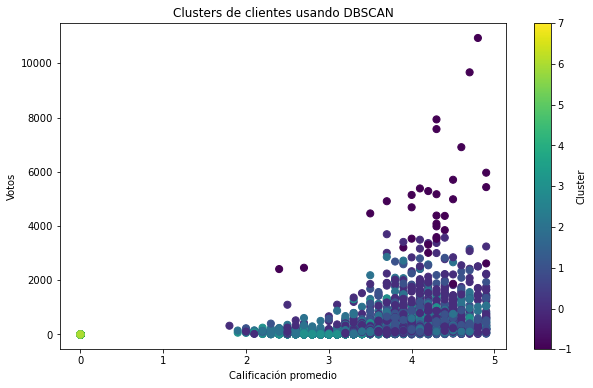

In [19]:
# Graficar los clústeres encontrados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(x['Aggregate rating'], x['Votes'], c=x['Cluster'], cmap='viridis', s=50)
plt.colorbar(label='Cluster')
plt.xlabel('Calificación promedio')
plt.ylabel('Votos')
plt.title('Clusters de clientes usando DBSCAN')
plt.show()

Perfil característico de cada clúster:

Clúster 1: Tienen la calificación promedio más alta (4.20) y el mayor número de votos (4850), con un rango de precios moderado de  2.51.

Clúster 0: Clientes con una calificación promedio alta (3.77), una cantidad intermedia de votos (410) y un precio promedio de rango medio de 3. 

Clúster 2: Presenta calificaciones moderadas (3.37), un número bajo de votos (150), y precios bajos con un rango promedio de 2.

Clúster 3: Clientes con calificaciones más bajas (3.23), muy pocos votos (67), y un rango de precios más accesible.

Clúster 4: Este grupo prácticamente no tiene actividad, con calificaciones promedio y votos cercanos a cero, manteniendo un rango de precios medio de 3.

Clúster 5, 6 y 7: Similar al clúster 4, estos grupos tienen calificaciones, votos y actividad prácticamente nulas, aunque con diferentes rangos de precio promedio (2, 3 y 4, respectivamente).

# Acción 3: Aplicación Agglomerative Clustering.

Selección de Variables:

Rango de precio (Price range): Es importante para segmentar clientes con distintos niveles de gasto.

Calificación agregada (Aggregate rating): Refleja la calidad general percibida por los usuarios.

Votos (Votes: Cantidad de opiniones recibidas, lo que indica popularidad.

¿Entrega ahora? (Has Online delivery): Es una variable binaria que ayuda a entender si el servicio está disponible activamente.

In [11]:
# Utilizaremos la variable si hay pedido online , para ello la pasamos a numerica

data = df.copy() 
data['Has Online delivery'] = data['Has Online delivery'].map({'Yes': 1, 'No': 0})
data




,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,0,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,0,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,0,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,0,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,0,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,0,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,0,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,0,No,No,4,3.7,Yellow,Good,661
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,0,No,No,4,4.0,Green,Very Good,901


In [17]:
n_clusters = 2
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
clusters = agg_clustering.fit_predict(scaled_data)

# Añadir los clústeres al DataFrame original
df['Cluster'] = clusters



# Resumen de los perfiles de cada clúster
cluster_summary = df.groupby('Cluster')[['Price range', 'Aggregate rating', 'Votes', 'Has Online delivery']].mean()
print("Resumen del Perfil de Clústeres:")
print(cluster_summary)

Resumen del Perfil de Clústeres:
         Price range  Aggregate rating       Votes
Cluster                                           
0           2.435028          3.502972  313.206092
1           1.336679          2.044872   40.799818


Clúster 0: Este grupo presenta un rango de precios moderado (promedio de 2.43), con una calificación agregada alta de aproximadamente 3.5 y una cantidad significativa de votos (313.2). Esto sugiere que los clientes de este clúster suelen calificar bien los servicios, el precio está en un rango accesible o medio, y además estos servicios o locales reciben una mayor participación y popularidad en términos de votos.

Clúster 1: Este clúster tiene un rango de precios bajo (1.33), con una calificación agregada baja (2.04) y pocos votos (40.8). Los clientes en este grupo parecen estar menos satisfechos con los servicios, reflejado en las calificaciones bajas y la escasa participación en términos de opiniones o votos. Es probable que este clúster incluya servicios menos reconocidos o menos populares.

# Acción 4: Conclusiones.

Con el análisis inicial utilizando las variables Aggregate Rating y Votes, se identificaron clústers que agrupan a los restaurantes según su calificación promedio y la cantidad de votos recibidos. En el gráfico, se observa una alta densidad de puntos en la región donde la calificación está entre 3 y 5, con votos inferiores a 2000, mientras que hay puntos aislados con calificaciones bajas o muchos votos, lo que podría indicar outliers. Este análisis permitió categorizar los restaurantes según su popularidad y reputación, diferenciando claramente entre aquellos más destacados y los menos interactuados. Sin embargo, al no considerar otras variables importantes, el análisis puede estar limitado a una perspectiva superficial de los clientes.


Al incorporar una tercera variable (Price Range), los clústers ganaron en profundidad, permitiendo identificar perfiles más específicos de los restaurantes. Por ejemplo, el clúster 0 se caracteriza por restaurantes con un promedio de calificación más bajo (2.67), menor cantidad de votos (157 votos en promedio) y un rango de precios más accesible (1.8, cercano al nivel económico). Esto podría representar restaurantes menos populares que atraen a clientes que priorizan precios bajos. En contraste, clústers con calificaciones y votos más altos probablemente correspondan a restaurantes con un rango de precios superior, dirigidos a un público que valora más la calidad que el costo. Este análisis desglosado permite segmentar de manera más efectiva los tipos de clientes y desarrollar estrategias específicas para cada grupo, como promociones para restaurantes económicos o enfoques premium para los de alta gama.


El algoritmo DBSCAN permitió identificar patrones más detallados en los datos, distinguiendo claramente entre clientes con alta participación y aquellos con muy poca o ninguna actividad. El clúster -1 sobresale por reunir a los clientes más activos y satisfechos, caracterizados por calificaciones promedio elevadas y un gran número de votos. En contraste, los clústeres 4, 5, 6 y 7 representan grupos con una participación casi nula. Esto sugiere que, aunque la mayoría de los clientes se encuentran en niveles intermedios de calificación y precios, existe un grupo destacado de clientes muy activos y otro segmento considerablemente inactivo.

Se utilizo el método Ward con la distancia euclidiana para realizar un clustering jerárquico aglomerativo. En el dendrograma, observamos claramente la formación de 2 clústeres como la solución óptima. El Clúster 0 agrupa servicios con mayor participación, mejor calificación y precios moderados, mientras que el Clúster 1 corresponde a servicios con menor calificación, menos participación y precios más bajos. Esto sugiere que la calidad percibida y la popularidad influyen significativamente en la agrupación de los clientes.

# Referencias

Giuseppe Bonaccorso. (2018). Machine Learning Algorithms: Popular Algorithms for
Data Science and Machine Learning, 2nd Edition: Vol. 2nd ed. Packt Publishing.
(pp. 340-355).

Raschka, S., & Mirjalili, V. (2017). Python Machine Learning - Second Edition: Vol.
2nd ed. Packt Publishing. (pp. 363-372).

https://cienciadedatos.net/documentos/py20-clustering-con-python


https://www.datadoghq.com/es/dg/monitor/free-trial/?utm_source=google&utm_medium=paid-search&utm_campaign=dg-brand-latam-es-apm&utm_keyword=analisis%20de%20datos%20con%20python&utm_matchtype=p&igaag=156719425627&igaat=&igacm=20562974778&igacr=674602664396&igakw=analisis%20de%20datos%20con%20python&igamt=p&igant=g&utm_campaignid=20562974778&utm_adgroupid=156719425627&gad_source=1&gclid=CjwKCAiA34S7BhAtEiwACZzv4e3Ou8TEKb4dkVf8ChE1uhEhGEzKbkK_fYMyXSHJEZtaDGZ53jqbgxoCtFcQAvD_BwE

